<a href="https://colab.research.google.com/github/bhargav-borah/StockPriceForecastRNN/blob/main/recurrent_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Recurrent Neural Network

## Data Preprocessing

### Importing the libraries

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Importing the Training set

In [45]:
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values

### Feature Scaling

In [46]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
training_set_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

### Creating a data structure with 60 timesteps and 1 output

In [47]:
X_train = []
y_train = []
for i in range(60, 1258):
  X_train.append(training_set_scaled[i-60:i, 0])
  y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [48]:
X_train

array([[0.08581368, 0.09701243, 0.09433366, ..., 0.07846566, 0.08034452,
        0.08497656],
       [0.09701243, 0.09433366, 0.09156187, ..., 0.08034452, 0.08497656,
        0.08627874],
       [0.09433366, 0.09156187, 0.07984225, ..., 0.08497656, 0.08627874,
        0.08471612],
       ...,
       [0.92106928, 0.92438053, 0.93048218, ..., 0.95475854, 0.95204256,
        0.95163331],
       [0.92438053, 0.93048218, 0.9299055 , ..., 0.95204256, 0.95163331,
        0.95725128],
       [0.93048218, 0.9299055 , 0.93113327, ..., 0.95163331, 0.95725128,
        0.93796041]])

In [49]:
y_train

array([0.08627874, 0.08471612, 0.07454052, ..., 0.95725128, 0.93796041,
       0.93688146])

### Reshaping

In [50]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1)) # (batch_size, timesteps, no_of_indicators )

In [51]:
X_train

array([[[0.08581368],
        [0.09701243],
        [0.09433366],
        ...,
        [0.07846566],
        [0.08034452],
        [0.08497656]],

       [[0.09701243],
        [0.09433366],
        [0.09156187],
        ...,
        [0.08034452],
        [0.08497656],
        [0.08627874]],

       [[0.09433366],
        [0.09156187],
        [0.07984225],
        ...,
        [0.08497656],
        [0.08627874],
        [0.08471612]],

       ...,

       [[0.92106928],
        [0.92438053],
        [0.93048218],
        ...,
        [0.95475854],
        [0.95204256],
        [0.95163331]],

       [[0.92438053],
        [0.93048218],
        [0.9299055 ],
        ...,
        [0.95204256],
        [0.95163331],
        [0.95725128]],

       [[0.93048218],
        [0.9299055 ],
        [0.93113327],
        ...,
        [0.95163331],
        [0.95725128],
        [0.93796041]]])

## Building the RNN

### Importing Keras libraries and packages

In [52]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

### Initialising the RNN

In [53]:
regressor = Sequential()

### Adding the first LSTM layer and some Dropout regularisation

In [54]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))  # return_sequences is False by default, set it to True if you have to add another LSTM layer
regressor.add(Dropout(0.2)) # 20% neurons of the LSTM will be dropped out during each iteration (to prevent overfitting)

### Adding the second LSTM layer and some Dropout regularisation

In [55]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))  # return_sequences is False by default, set it to True if you have to add another LSTM layer
regressor.add(Dropout(0.2)) # 20% neurons of the LSTM will be dropped out during each iteration (to prevent overfitting)

### Adding the third LSTM layer and some Dropout regularisation

In [56]:
regressor.add(LSTM(units = 50, return_sequences = True))  # return_sequences is False by default, set it to True if you have to add another LSTM layer
regressor.add(Dropout(0.2)) # 20% neurons of the LSTM will be dropped out during each iteration (to prevent overfitting)

### Adding the fourth LSTM layer and some Dropout regularisation

In [57]:
regressor.add(LSTM(units = 50, return_sequences = False))  # return_sequences is False by default, set it to True if you have to add another LSTM layer
regressor.add(Dropout(0.2)) # 20% neurons of the LSTM will be dropped out during each iteration (to prevent overfitting)

### Adding the output layer

In [58]:
regressor.add(Dense(units = 1))

### Compiling the RNN

In [59]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

### Fitting the RNN to the Training set

In [60]:
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 15s 164ms/step - loss: 0.0399
Epoch 2/100
38/38 [==============================] - 5s 131ms/step - loss: 0.0061
Epoch 3/100
38/38 [==============================] - 6s 165ms/step - loss: 0.0063
Epoch 4/100
38/38 [==============================] - 5s 131ms/step - loss: 0.0050
Epoch 5/100
38/38 [==============================] - 6s 149ms/step - loss: 0.0047
Epoch 6/100
38/38 [==============================] - 6s 144ms/step - loss: 0.0047
Epoch 7/100
38/38 [==============================] - 5s 129ms/step - loss: 0.0045
Epoch 8/100
38/38 [==============================] - 6s 164ms/step - loss: 0.0049
Epoch 9/100
38/38 [==============================] - 5s 129ms/step - loss: 0.0041
Epoch 10/100
38/38 [==============================] - 6s 163ms/step - loss: 0.0047
Epoch 11/100
38/38 [==============================] - 5s 130ms/step - loss: 0.0043
Epoch 12/100
38/38 [==============================] - 5s 135ms/step - loss: 0.0042
Epoch 13/100

## Making the predictions and Visualising the results

### Getting the real stock prices of 2017

In [61]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_prices = dataset_test.iloc[:, 1:2].values

### Getting the predicted stock prices of 2017

In [65]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1, 1)
inputs = sc.transform(inputs)

In [67]:
X_test = []
for i in range(60, 80): # we are gonna predict for 20 days of the month (financial month => 20 days)
  X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1)) # (batch_size, timesteps, no_of_indicators )

In [68]:
predicted_stock_prices = regressor.predict(X_test)
predicted_stock_prices_original = sc.inverse_transform(predicted_stock_prices)

1/1 [==============================] - 2s 2s/step


### Visualising the Results

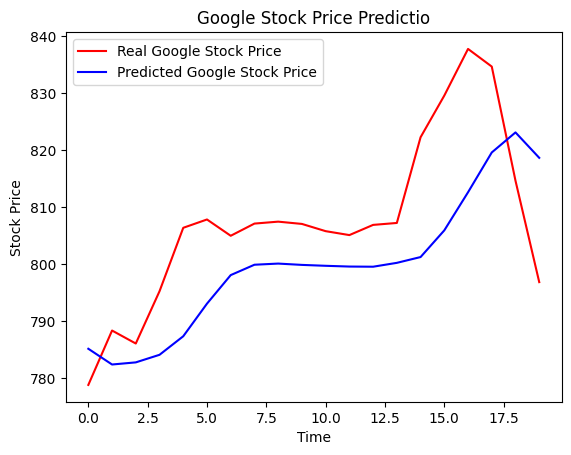

In [69]:
plt.plot(real_stock_prices, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_prices_original, color = 'blue', label = 'Predicted Google Stock Price')
plt.legend()
plt.title('Google Stock Price Predictio')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.show()